Credit card fraud costs about 1% of their revenue to the banks, an amount which customers
(us) eventually pay. Let's find those anomalies which might reveal a fraud. Download the
popular credit card dataset from Kaggle.

In [1]:
import sys
import torch
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plot
%matplotlib inline
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import KFold 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, f1_score, precision_recall_curve

## 1. [10 pts] Explore the dataset, list number of rows and columns, check sanity, examine features (e.g. histograms/plots).

In [2]:
data = pd.read_csv('creditcard.csv')
print('Columns: ', len(data.columns), '\nRows: ', len(data))
data

Columns:  31 
Rows:  284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Col:  Time
Nulls:  0
Max:  172792.0
Min :  0.0
Mean:  94813.85957508067
Mode:  [163152.]


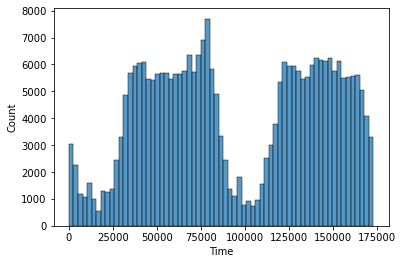

Col:  V1
Nulls:  0
Max:  2.45492999121121
Min :  -56.407509631329
Mean:  3.918648695036257e-15
Mode:  [1.24567382 2.05579701]


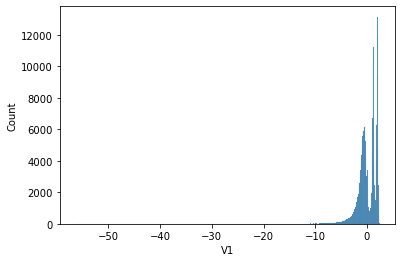

Col:  V2
Nulls:  0
Max:  22.0577289904909
Min :  -72.7157275629303
Mean:  5.682685792130225e-16
Mode:  [-0.32666777  0.16697502]


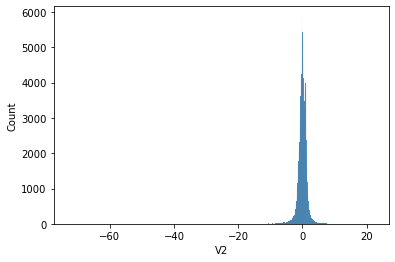

Col:  V3
Nulls:  0
Max:  9.38255843282114
Min :  -48.3255893623954
Mean:  -8.761736096748595e-15
Mode:  [-2.75204096  0.48830574]


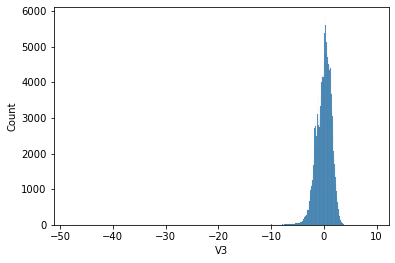

Col:  V4
Nulls:  0
Max:  16.8753440335975
Min :  -5.68317119816995
Mean:  2.811117739148197e-15
Mode:  [-0.84231603  0.63532192]


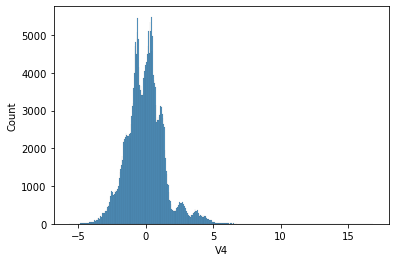

Col:  V5
Nulls:  0
Max:  34.8016658766686
Min :  -113.743306711146
Mean:  -1.5521030502078707e-15
Mode:  [-0.56277668  2.46307226]


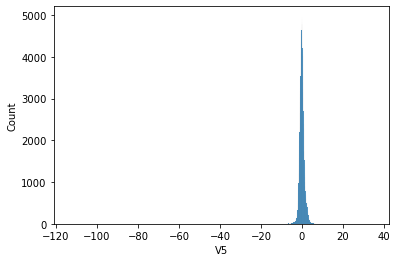

Col:  V6
Nulls:  0
Max:  73.3016255459646
Min :  -26.1605059358433
Mean:  2.0401296791980286e-15
Mode:  [-1.01107262  3.17385642]


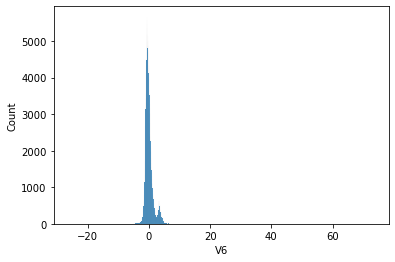

Col:  V7
Nulls:  0
Max:  120.589493945238
Min :  -43.5572415712451
Mean:  -1.6989526516142345e-15
Mode:  [-0.43212592  0.01495266]


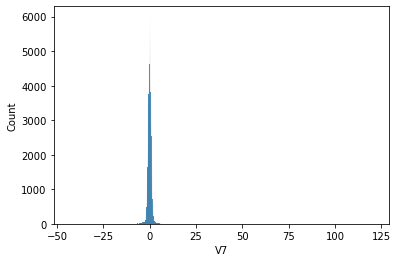

Col:  V8
Nulls:  0
Max:  20.0072083651213
Min :  -73.2167184552674
Mean:  -1.893285242852593e-16
Mode:  [-0.16021086  0.7277062 ]


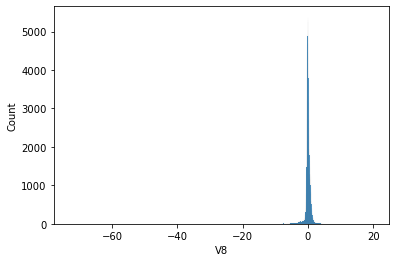

Col:  V9
Nulls:  0
Max:  15.5949946071278
Min :  -13.4340663182301
Mean:  -3.1476403646582977e-15
Mode:  [0.17036185 0.60860587]


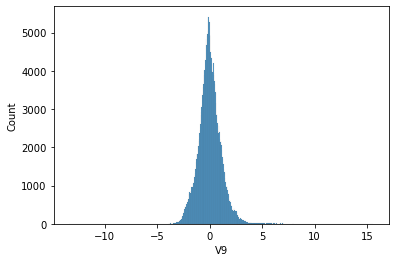

Col:  V10
Nulls:  0
Max:  23.7451361206545
Min :  -24.5882624372475
Mean:  1.7729245102328408e-15
Mode:  [-0.07518617 -0.04457459]


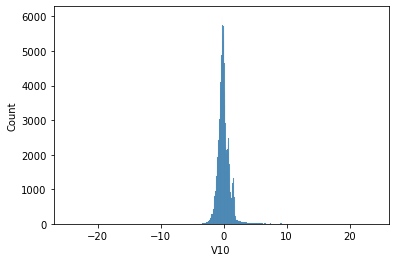

Col:  V11
Nulls:  0
Max:  12.0189131816199
Min :  -4.79747346479757
Mean:  9.289523852029893e-16
Mode:  [-0.35674902  0.06350446]


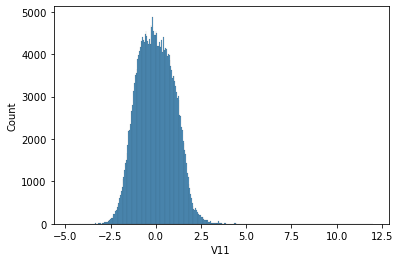

Col:  V12
Nulls:  0
Max:  7.8483920756446
Min :  -18.6837146333443
Mean:  -1.803266027201599e-15
Mode:  [-0.07345952  0.35056357]


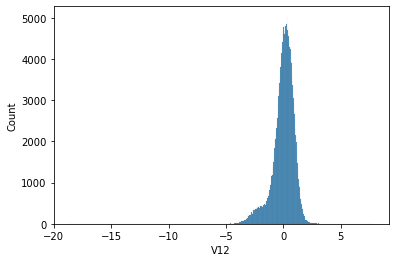

Col:  V13
Nulls:  0
Max:  7.12688295859376
Min :  -5.79188120632084
Mean:  1.6748882429362776e-15
Mode:  [-0.51775969 -0.14123832]


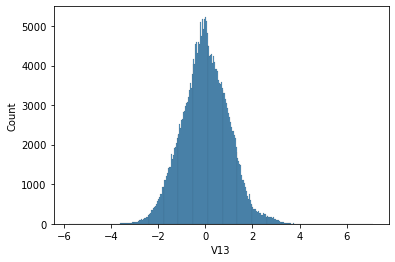

Col:  V14
Nulls:  0
Max:  10.5267660517847
Min :  -19.2143254902614
Mean:  1.4756212156133637e-15
Mode:  [0.40696893 0.69097162]


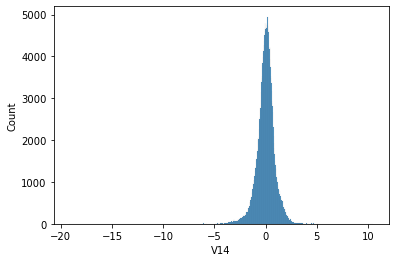

Col:  V15
Nulls:  0
Max:  8.87774159774277
Min :  -4.49894467676621
Mean:  3.5010981285929723e-15
Mode:  [1.12414692 1.27525704]


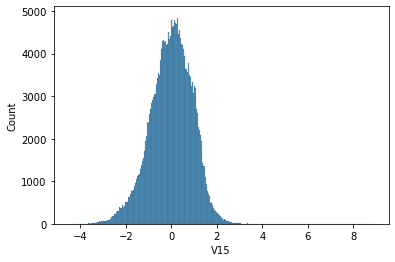

Col:  V16
Nulls:  0
Max:  17.3151115176278
Min :  -14.1298545174931
Mean:  1.3924602750615145e-15
Mode:  [-0.37196213  0.34246975]


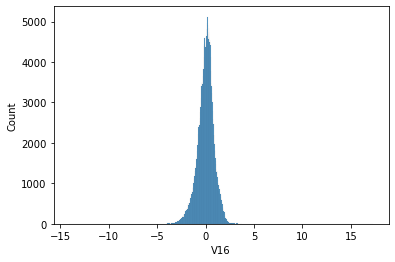

Col:  V17
Nulls:  0
Max:  9.25352625047285
Min :  -25.1627993693248
Mean:  -7.46653801202235e-16
Mode:  [-0.6019568  -0.37465644]


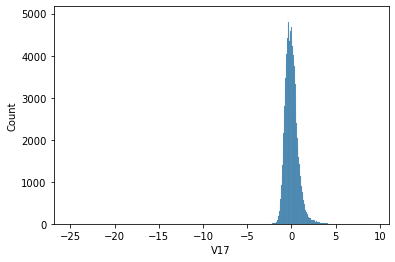

Col:  V18
Nulls:  0
Max:  5.04106918541184
Min :  -9.49874592104677
Mean:  4.25875353393465e-16
Mode:  [-0.43899243 -0.05264015]


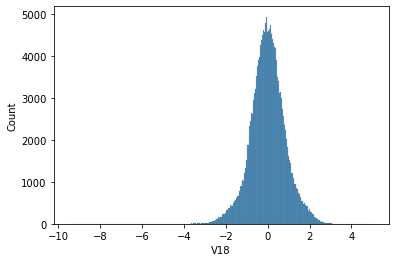

Col:  V19
Nulls:  0
Max:  5.59197142733558
Min :  -7.21352743017759
Mean:  9.01991936608283e-16
Mode:  [-0.33059045 -0.11609079]


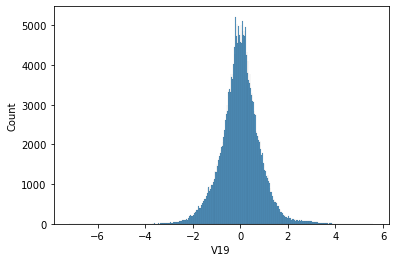

Col:  V20
Nulls:  0
Max:  39.4209042482199
Min :  -54.497720494566
Mean:  5.126845324048986e-16
Mode:  [-0.18037012 -0.13207972]


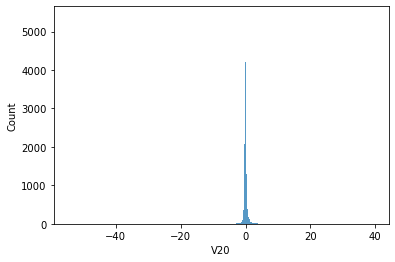

Col:  V21
Nulls:  0
Max:  27.2028391573154
Min :  -34.8303821448146
Mean:  1.4731202054036018e-16
Mode:  [-0.26258085  0.26976495]


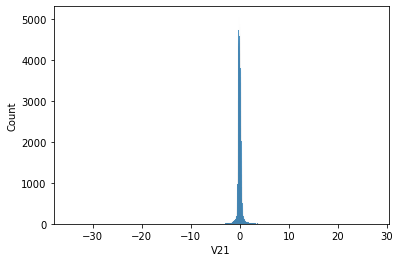

Col:  V22
Nulls:  0
Max:  10.5030900899454
Min :  -10.933143697655
Mean:  8.042109012847307e-16
Mode:  [-0.81626376  0.84462665]


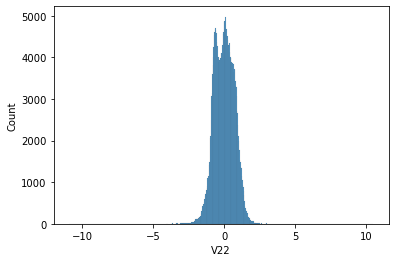

Col:  V23
Nulls:  0
Max:  22.5284116897749
Min :  -44.8077352037913
Mean:  5.282512464090729e-16
Mode:  [0.02067467 0.1403043 ]


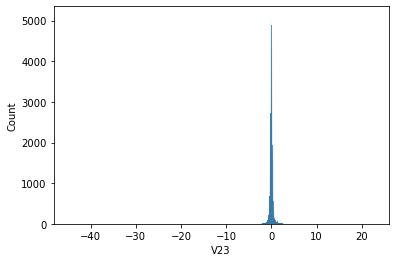

Col:  V24
Nulls:  0
Max:  4.58454913689817
Min :  -2.83662691870341
Mean:  4.4562714572286976e-15
Mode:  [0.35782725 0.72621188]


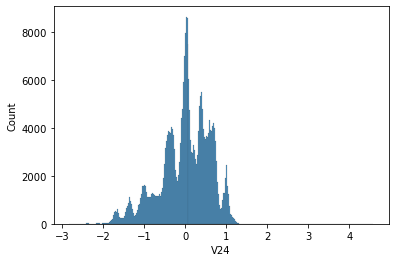

Col:  V25
Nulls:  0
Max:  7.51958867870916
Min :  -10.2953970749851
Mean:  1.426895638812344e-15
Mode:  [0.18642295 0.36662431]


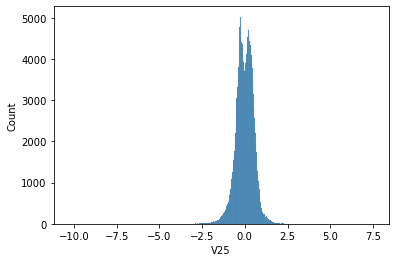

Col:  V26
Nulls:  0
Max:  3.5173456116238
Min :  -2.60455055280817
Mean:  1.7016396527443826e-15
Mode:  [-0.39882751  0.09654447]


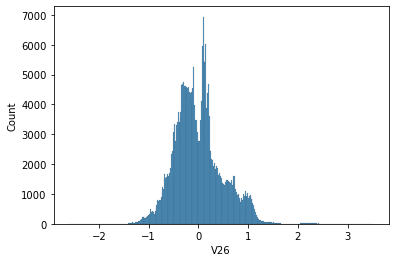

Col:  V27
Nulls:  0
Max:  31.6121981061363
Min :  -22.5656793207827
Mean:  -3.66225168710611e-16
Mode:  [-0.03586632  0.02773512]


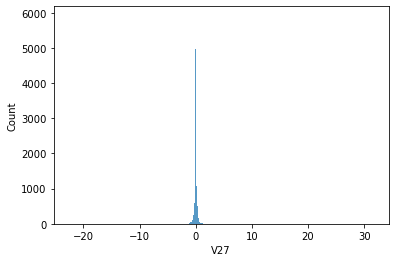

Col:  V28
Nulls:  0
Max:  33.8478078188831
Min :  -15.4300839055349
Mean:  -1.2178091119428193e-16
Mode:  [-0.06028215  0.01849457]


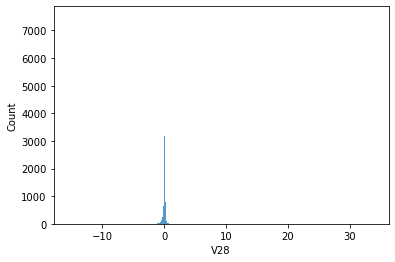

Col:  Amount
Nulls:  0
Max:  25691.16
Min :  0.0
Mean:  88.34961925087359
Mode:  [1.]


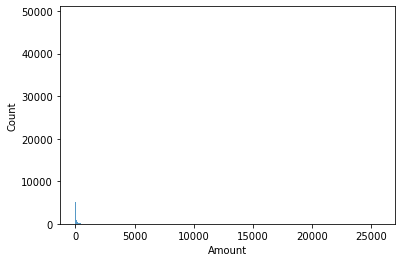

Col:  Class
Nulls:  0
Max:  1
Min :  0
Mean:  0.001727485630620034
Mode:  [0]


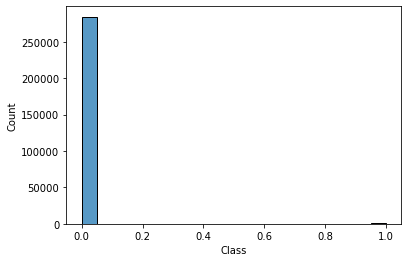

In [3]:
for col in data.columns:
    print('Col: ', col)
    print('Nulls: ', data[col].isnull().sum())
    print('Max: ', data[col].max())
    print('Min : ', data[col].min())
    print('Mean: ', data[col].mean())
    print('Mode: ', data[col].mode().values)
    sea.histplot(data=data, x=col)
    plot.show()

## 2. [10 pts] Check the class balance and pick an evaluation metric.
Since the classes are so unbalanced, I will be using AUC under a precision recall curve and f1 score.

In [4]:
labels = data['Class']
labels.value_counts()

0    284315
1       492
Name: Class, dtype: int64

## 3. [10 pts] Check if you need normalization or standardization, and justify. Complete preprocessing.
I will be normalizing the dataset since the range of the columns are extremely different. If a column has a max value of 99 vs another column witha  max value of 1, then the first column may be weighted higher. This is not optimal.

In [5]:
X = data.iloc[:, 0:30]
scaler = MinMaxScaler() 
data_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
for col in data_scaled.columns:
    print('Col: ', col)
    print('Max: ', data_scaled[col].max())
    print('Min : ', data_scaled[col].min())
    print('Mean: ', data_scaled[col].mean())

Col:  Time
Max:  1.0
Min :  0.0
Mean:  0.5487167205372921
Col:  V1
Max:  1.0
Min :  0.0
Mean:  0.9582937777137208
Col:  V2
Max:  1.0
Min :  0.0
Mean:  0.7672583675571824
Col:  V3
Max:  1.0
Min :  0.0
Mean:  0.8374136271689916
Col:  V4
Max:  1.0
Min :  0.0
Mean:  0.2519301975232297
Col:  V5
Max:  0.9999999999999999
Min :  0.0
Mean:  0.7657162994453094
Col:  V6
Max:  0.9999999999999999
Min :  0.0
Mean:  0.2630197598432574
Col:  V7
Max:  1.0
Min :  0.0
Mean:  0.2653555151992079
Col:  V8
Max:  1.0
Min :  0.0
Mean:  0.7853854793773328
Col:  V9
Max:  1.0
Min :  0.0
Mean:  0.46277991398939505
Col:  V10
Max:  1.0
Min :  0.0
Mean:  0.508721984608456
Col:  V11
Max:  1.0
Min :  0.0
Mean:  0.28528563035980997
Col:  V12
Max:  1.0
Min :  0.0
Mean:  0.7041926537636768
Col:  V13
Max:  1.0
Min :  0.0
Mean:  0.4483309032028618
Col:  V14
Max:  0.9999999999999999
Min :  0.0
Mean:  0.6460531370577711
Col:  V15
Max:  1.0
Min :  0.0
Mean:  0.33632729245803145
Col:  V16
Max:  1.0
Min :  0.0
Mean:  0.449351877

In [6]:
data_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


## 4. [20 pts] Split the dataset 50-50 for training and testing. Then run SVC, DecisionTreeClassifier, MLPClassifier, RandomForest without any tree pruning or regularization. Report the classification performance. Then run SVC, DecisionTreeClassifier, MLPClassifier with tree pruning and regularization<br> (Hint: might use GridSearchCV to optimize the regularization parameters; or simply run a few pilot tests). <br>Report the classification performance.

In [7]:
def metrics(name, pred, truth, prob):
    precision, recall, thresholds = precision_recall_curve(truth, prob)
    AUC = auc(recall, precision)
    f1 = f1_score(truth, pred)
    print(name)
    print('AUC: ', AUC)
    print('F1: ', f1)
    plot.plot(recall, precision, marker='.', label='Logistic')
    plot.show()
    

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.5, random_state=0)

In [9]:
print(len(y_train), y_train.sum(), y_test.sum())

142403 249 243


SVC
AUC:  0.7181826337081295
F1:  0.8078602620087335


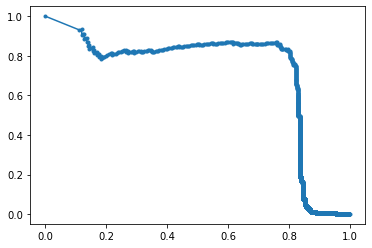

In [10]:
svcCLF = SVC(kernel='linear', probability=True)
svcCLF.fit(X_train, y_train)
y_pred = svcCLF.predict(X_test)
y_proba = svcCLF.predict_proba(X_test)
y_proba = y_proba[:, 1]
metrics('SVC', y_pred, y_test, y_proba)

Decision Tree
AUC:  0.764465742522979
F1:  0.7640918580375783


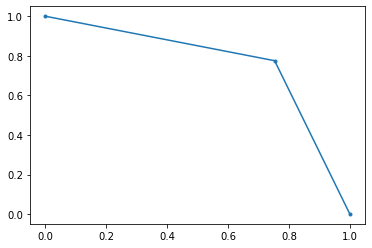

In [11]:
dtCLF = DecisionTreeClassifier(random_state=0)
dtCLF.fit(X_train, y_train)
y_pred = dtCLF.predict(X_test)
y_proba = dtCLF.predict_proba(X_test)
y_proba = y_proba[:, 1]
metrics('Decision Tree', y_pred, y_test, y_proba)

MLP
AUC:  0.7564177154700668
F1:  0.7084337349397589


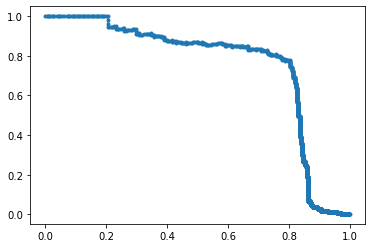

In [12]:
mlpCLF = MLPClassifier(random_state=1, max_iter=300)
mlpCLF.fit(X_train, y_train)
y_pred = mlpCLF.predict(X_test)
y_proba = mlpCLF.predict_proba(X_test)
y_proba = y_proba[:, 1]
metrics('MLP', y_pred, y_test, y_proba)

Random Forest
AUC:  0.8282983707586578
F1:  0.8447488584474886


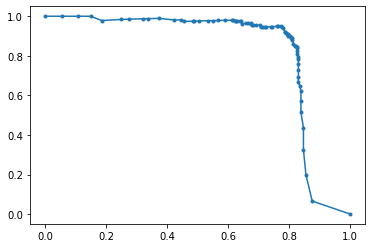

In [13]:
rfCLF = RandomForestClassifier()
rfCLF.fit(X_train, y_train)
y_pred = rfCLF.predict(X_test)
y_proba = rfCLF.predict_proba(X_test)
y_proba = y_proba[:, 1]
metrics('Random Forest', y_pred, y_test, y_proba)

## 5. [30 pts] Script a PyTorch neural network with a hidden layer (might experiment with 2 hidden layers, size might be 20 to 40). Report the classification performance on the previous 50-50 dataset. Expect a similar performance to the neural network in Q4.
At first, I was using the RProp optimizer with a learning rate of 0.001. This gave me classification of all 0s. When I switched to Adam, this helped a lot. The best performing neural net seems to be a single layer with no drop out and a learning rate of 0.01. The learning rate of the dropout network must be 0.001 or else it will do worse than guessing.

In [14]:
##This class is built using a lot of the same idea as the class module, but I wanted to add some improvements so it isn't copying
print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')
class PNN(torch.nn.Module):
    def __init__(self, size =2, n_hidden=[20,10], epochs=100, eta=0.001, batch=64, dropout=False, seed=0):
        assert isinstance(n_hidden, list), 'Not a list'
        super(PNN, self).__init__()
        self.flatten = torch.nn.Flatten()
        if (not size == 1 and not size == 2):
            self.size = 2
        else:
            self.size = size
        if (not len(n_hidden) == self.size and self.size == 1):
            self.n_hidden = [20]
        elif (not len(n_hidden) == self.size and self.size == 2):
            self.n_hidden = [20,10]
        else:
            self.n_hidden=n_hidden
        self.epochs = epochs
        self.eta = eta
        self.batch = batch
        self.dropout= dropout
        self.random = np.random.RandomState(seed)
        class_weights=torch.tensor([.1,.9],dtype=torch.float)
        self.loss_func = torch.nn.CrossEntropyLoss(weight=class_weights)
        self.model = None
        print('Size: ', self.size, '  n_hidden: ', self.n_hidden)
        
    def init_layers(self, input_size, output_size):
        if(self.dropout):
            if(self.size ==1):
                self.model = torch.nn.Sequential(
                    torch.nn.Linear(input_size, self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], self.n_hidden[0]),
                    torch.nn.ReLU(),
                    torch.nn.Dropout(0.2),
                    torch.nn.Linear(self.n_hidden[0], output_size)
                )
            else:
                self.model = torch.nn.Sequential(
                    torch.nn.Linear(input_size, self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], self.n_hidden[1]),
                    torch.nn.ReLU(),
                    torch.nn.Dropout(0.2),
                    torch.nn.Linear(self.n_hidden[1], output_size)
                )
        else:
            if(self.size ==1):
                self.model = torch.nn.Sequential(
                    torch.nn.Linear(input_size, self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], output_size)
                )
            else:
                self.model = torch.nn.Sequential(
                    torch.nn.Linear(input_size, self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], self.n_hidden[0]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[0], self.n_hidden[1]),
                    torch.nn.Sigmoid(),
                    torch.nn.Linear(self.n_hidden[1], output_size)
                )
                
    def predict(self, _X):
        _X = torch.FloatTensor(_X)
        assert self.model != None
        self.model.eval()
        with torch.no_grad():
            y_pred = np.argmax(self.model(_X), axis=1)
        self.model.train()
        return y_pred.numpy()
    
    def predict_proba(self, _X):
        _X = torch.FloatTensor(_X)
        softmax = torch.nn.Softmax(dim=1)
        assert self.model != None
        self.model.eval()
        with torch.no_grad():
            y_pred = softmax(self.model(_X))
        self.model.train()
        return y_pred.numpy()
    
    def fit(self, _X_train, _y_train, info=False):
        _X_train, _y_train = torch.FloatTensor(_X_train), torch.LongTensor(_y_train)
        n_features = _X_train.shape[1]
        n_output= np.unique(_y_train).shape[0]  # number of class labels
        
        self.init_layers(n_features, n_output)

        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.eta)

        totloss = 0
        for i in tqdm(range(self.epochs)):
            indices = np.arange(_X_train.shape[0])
            self.random.shuffle(indices)  # shuffle the data each epoch

            for start_idx in range(0, indices.shape[0] - self.batch + 1, self.batch):
                batch_idx = indices[start_idx:start_idx + self.batch]
                self.optimizer.zero_grad()
                
                net_out = self.model(_X_train[batch_idx])
                
                loss = self.loss_func(net_out, _y_train[batch_idx])
                loss.backward()
                self.optimizer.step()
        return self

PyTorch version= 1.9.1
CUDA available= False


In [15]:
hiddenCheck1 = PNN(1,[20,10],100, 0.001, 64, False) ## verifying that this checks to make sure size and n_hidden match
hiddenCheck2 = PNN(2,[20],100, 0.001, 64, False)
hiddenCheck3 = PNN(3,[20],100, 0.001, 64, False)
#hiddenCheck4 = PNN(1,20,100, 0.001, 64, False) ##Will throw an assertion error since not a list

Size:  1   n_hidden:  [20]
Size:  2   n_hidden:  [20, 10]
Size:  2   n_hidden:  [20, 10]


  0%|          | 0/50 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 50/50 [01:20<00:00,  1.61s/it]


142404 255 243
Single Layer Neural
AUC:  0.7326824765731716
F1:  0.7871485943775101


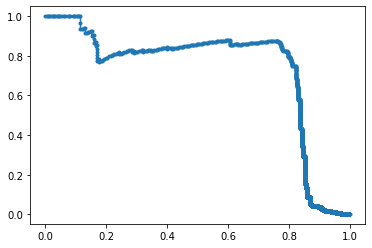

In [16]:
PNN1 = PNN(1,[20],50, 0.01, 64, False).fit(X_train.to_numpy(),y_train.to_numpy())
y_pred = PNN1.predict(X_test.to_numpy())
y_proba = PNN1.predict_proba(X_test.to_numpy())
y_proba = y_proba[:, 1]
print(len(y_pred), y_pred.sum(), y_test.sum())
metrics('Single Layer Neural', y_pred, y_test, y_proba)

  0%|          | 0/50 [00:00<?, ?it/s]

Size:  2   n_hidden:  [20, 10]


100%|██████████| 50/50 [01:36<00:00,  1.93s/it]


142404 229 243
Double Layer Neural
AUC:  0.7101466646655938
F1:  0.8135593220338982


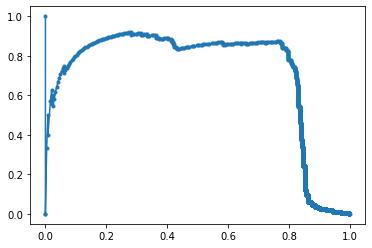

In [17]:
PNN2 = PNN(2,[20,10],50, 0.01, 64, False).fit(X_train.to_numpy(),y_train.to_numpy())
y_pred = PNN2.predict(X_test.to_numpy())
y_proba = PNN2.predict_proba(X_test.to_numpy())
y_proba = y_proba[:, 1]
print(len(y_pred), y_pred.sum(), y_test.sum())
metrics('Double Layer Neural', y_pred, y_test, y_proba)

## 6. [10 pts] Add dropout to the PyTorch neural network and repeat the previous step.

  0%|          | 0/50 [00:00<?, ?it/s]

Size:  2   n_hidden:  [20, 10]


100%|██████████| 50/50 [01:43<00:00,  2.06s/it]


DROP Single Layer Neural
AUC:  0.7406385102575044
F1:  0.761904761904762


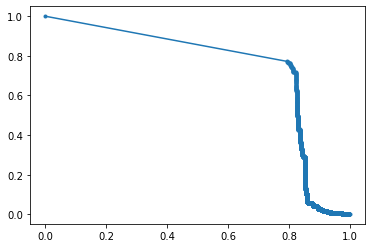

In [18]:
PNNDROP = PNN(2,[20,10],50, 0.01, 64, True).fit(X_train.to_numpy(),y_train.to_numpy())
y_pred = PNNDROP.predict(X_test.to_numpy())
y_proba = PNNDROP.predict_proba(X_test.to_numpy())
y_proba = y_proba[:, 1]
metrics('DROP Single Layer Neural', y_pred, y_test, y_proba)

## 7. [10 pts] Evaluate the 10-fold cross validation of Random Forest and two PyTorch neural network from Q5. and Q6. Comment about results.
I had to put some limits on the classifiers for time reasons. Random Forst has 5 estimators, and the neural networks both have 2 epochs. For these reasons, the Random Forest consistantly does better. If the neural networks had more time to train and were more refined (possibly 5-6 layers made by someone with more experience), then they would most likely do better.

In [19]:
X = data_scaled.to_numpy()
labels = labels.to_numpy()

1 Random Forest
AUC:  0.642177333682288
F1:  0.6974358974358974


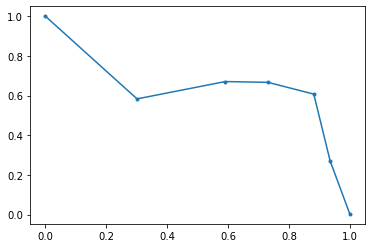

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.94s/it]

28481 235 93
1 Double Layer Neural
AUC:  0.6839296830731292
F1:  0.5182926829268293


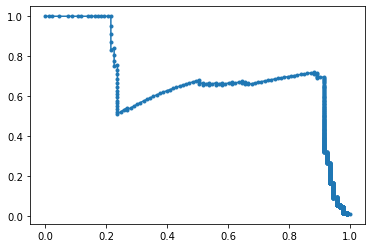

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.34s/it]

28481 103 93
1 DROP Double Layer Neural
AUC:  0.6830598671324685
F1:  0.7244897959183674


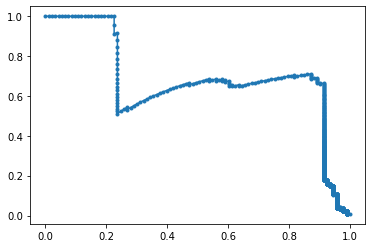

2 Random Forest
AUC:  0.8930301540921507
F1:  0.8852459016393444


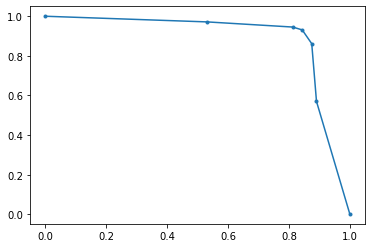

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.85s/it]

28481 117 64
2 Double Layer Neural
AUC:  0.8885632074109526
F1:  0.6408839779005525


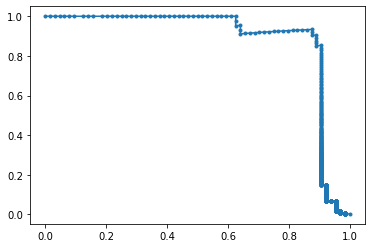

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.40s/it]

28481 51 64
2 DROP Double Layer Neural
AUC:  0.8780241459423547
F1:  0.8173913043478261


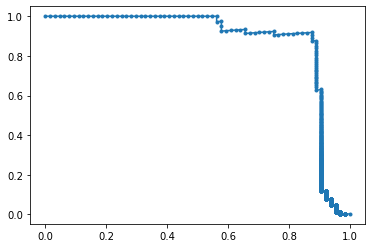

3 Random Forest
AUC:  0.8411888908625064
F1:  0.8571428571428571


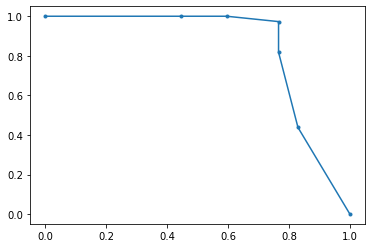

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.81s/it]

28481 52 47
3 Double Layer Neural
AUC:  0.7514743114348958
F1:  0.7474747474747475


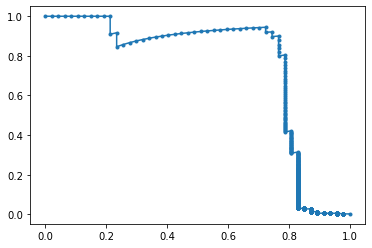

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:07<00:00,  3.59s/it]

28481 22 47
3 DROP Double Layer Neural
AUC:  0.7141843434513383
F1:  0.5797101449275361


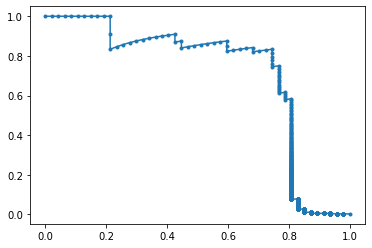

4 Random Forest
AUC:  0.7632264742303014
F1:  0.7936507936507937


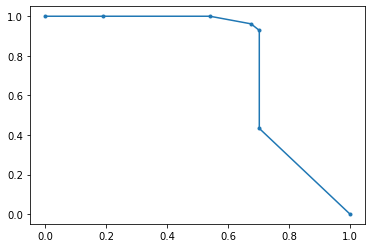

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.76s/it]


28481 61 37
4 Double Layer Neural
AUC:  0.7198369144766651
F1:  0.5306122448979592


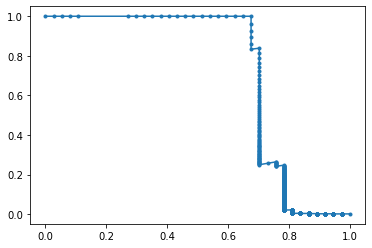

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.35s/it]

28481 18 37
4 DROP Double Layer Neural
AUC:  0.6845327814579617
F1:  0.6545454545454547


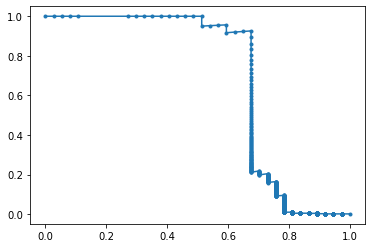

5 Random Forest
AUC:  0.7504196477379117
F1:  0.6923076923076924


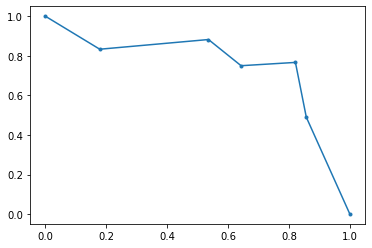

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.83s/it]

28481 46 28
5 Double Layer Neural
AUC:  0.6371321289954145
F1:  0.5135135135135135


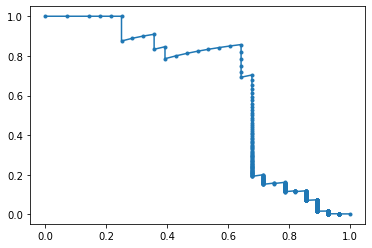

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.29s/it]


28481 16 28
5 DROP Double Layer Neural
AUC:  0.5804731984417489
F1:  0.5909090909090908


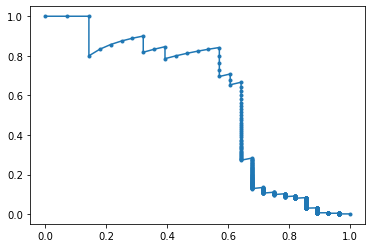

6 Random Forest
AUC:  0.8287261171067148
F1:  0.8379888268156425


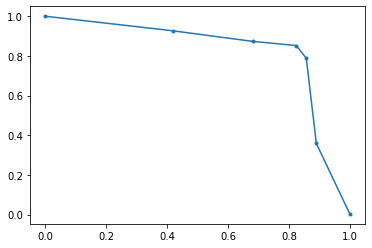

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.93s/it]

28481 204 91
6 Double Layer Neural
AUC:  0.8681550512389326
F1:  0.5423728813559322


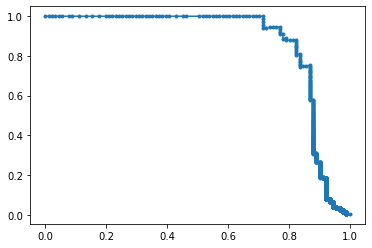

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.49s/it]

28481 69 91
6 DROP Double Layer Neural
AUC:  0.856278457333371
F1:  0.8250000000000001


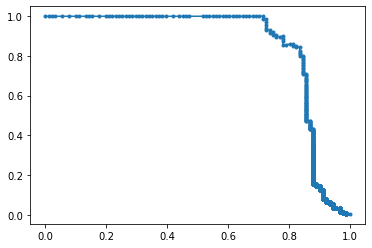

7 Random Forest
AUC:  0.6845209917919515
F1:  0.761904761904762


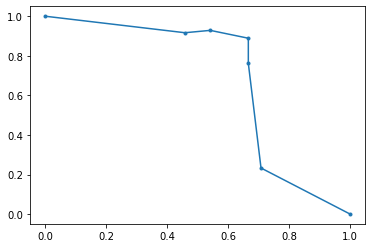

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.75s/it]

28481 59 24
7 Double Layer Neural
AUC:  0.6415144038278715
F1:  0.4096385542168675


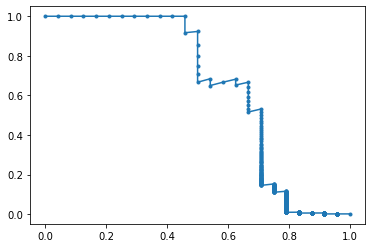

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.41s/it]

28481 14 24
7 DROP Double Layer Neural
AUC:  0.5948631118013126
F1:  0.631578947368421


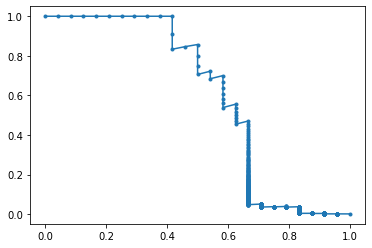

8 Random Forest
AUC:  0.8161642932465007
F1:  0.8421052631578948


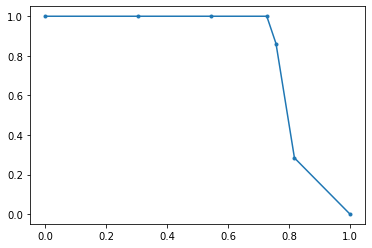

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.86s/it]

28480 26 33
8 Double Layer Neural
AUC:  0.8268770065015683
F1:  0.8135593220338984


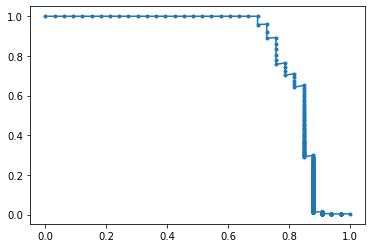

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.28s/it]

28480 23 33
8 DROP Double Layer Neural
AUC:  0.7860081817477271
F1:  0.7857142857142856


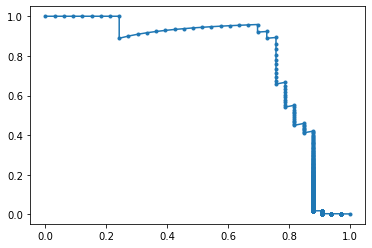

9 Random Forest
AUC:  0.8273273886419504
F1:  0.8043478260869565


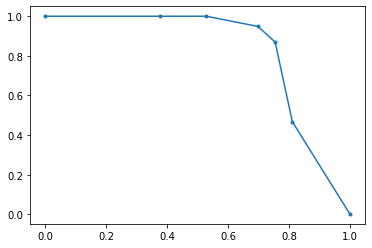

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

28480 36 53
9 Double Layer Neural
AUC:  0.8314936209013678
F1:  0.8089887640449438


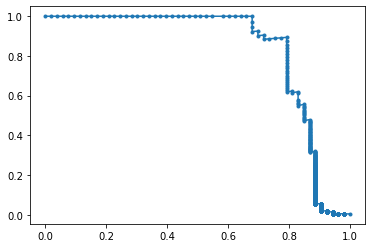

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.26s/it]

28480 34 53
9 DROP Double Layer Neural
AUC:  0.7966716552271847
F1:  0.7586206896551724


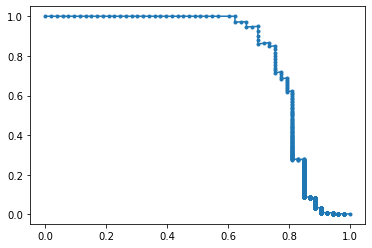

10 Random Forest
AUC:  0.6676118343074474
F1:  0.7317073170731707


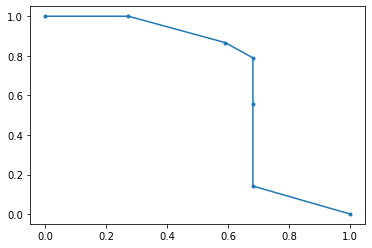

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:05<00:00,  2.84s/it]

28480 19 22
10 Double Layer Neural
AUC:  0.5982903064009998
F1:  0.6829268292682926


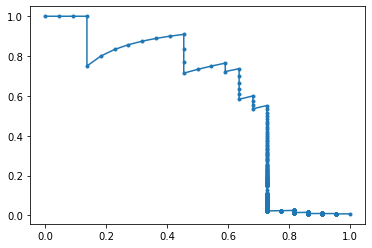

  0%|          | 0/2 [00:00<?, ?it/s]

Size:  1   n_hidden:  [20]


100%|██████████| 2/2 [00:06<00:00,  3.42s/it]

28480 8 22
10 DROP Double Layer Neural
AUC:  0.546710381936901
F1:  0.4666666666666667


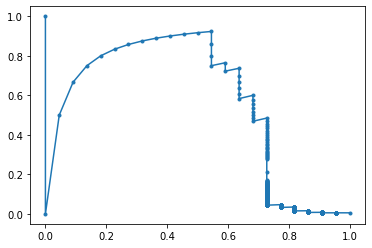

In [20]:
kf = KFold(n_splits=10, random_state=None, shuffle=False)
count = 0
for train_index, test_index in kf.split(X):
    count = count + 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    rfCLF = RandomForestClassifier(n_estimators=5)
    rfCLF.fit(X_train, y_train)
    y_pred = rfCLF.predict(X_test)
    y_proba = rfCLF.predict_proba(X_test)
    y_proba = y_proba[:, 1]
    metrics(f'{count} Random Forest', y_pred, y_test, y_proba)
    PNN2 = PNN(1,[20],2, 0.01, 64, False).fit(X_train,y_train)
    y_pred = PNN2.predict(X_test)
    y_proba = PNN2.predict_proba(X_test)
    y_proba = y_proba[:, 1]
    print(len(y_pred), y_pred.sum(), y_test.sum())
    metrics(f'{count} Double Layer Neural', y_pred, y_test, y_proba)
    PNNDROP = PNN(1,[20],2, 0.001, 64, True).fit(X_train,y_train)
    y_pred = PNNDROP.predict(X_test)
    y_proba = PNNDROP.predict_proba(X_test)
    y_proba = y_proba[:, 1]
    print(len(y_pred), y_pred.sum(), y_test.sum())
    metrics(f'{count} DROP Double Layer Neural',y_pred, y_test, y_proba)